In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.patches as pch
import eleanor_constants as EL

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

%matplotlib inline
savename = "./figures/3.pdf"

In [2]:
df = pd.read_csv('./data/trajectories/summary/cleaned_animal_analyses.csv')
labels = ["F", "FE", "Y", "G", "A", "Q", "I", "O", "W"]

fed_data = []
temp1 = df[df['A_starved'] == 'no']
for label in labels:
    treat = EL.treatments.get(label)
    temp = temp1[temp1['A_treatment_odor'] == treat]
    fed_data.append(temp)
    
str_data = []
temp1 = df[df['A_starved'] == '1day']
for label in labels:
    treat = EL.treatments.get(label)
    temp = temp1[temp1['A_treatment_odor'] == treat]
    str_data.append(temp)
    
lens = [len(df) for df in fed_data]
print(lens)
lens = [len(df) for df in str_data]
print(lens)

angle_df = pd.read_csv("./data/trajectories/summary/modeling_Starved_experiment_all_animals.csv")
angle_df = angle_df[angle_df["speed_mm_s"] >= 1]
display(angle_df.describe())
f_ang = angle_df[angle_df["treatment_odor"] == "naive_100ul_left_food_05percent"]
q_ang = angle_df[angle_df["treatment_odor"] == "naive_100ul_left_quinine_10mM"]
w_ang = angle_df[angle_df["treatment_odor"] == "naive_100ul_left_milliQ_water"]

print(f_ang["animal_ID"].nunique(), q_ang["animal_ID"].nunique(), w_ang["animal_ID"].nunique())

f_angd = [x for x in f_ang["angle_delta"].values if ~np.isnan(x)]
q_angd = [x for x in q_ang["angle_delta"].values if ~np.isnan(x)]
w_angd = [x for x in w_ang["angle_delta"].values if ~np.isnan(x)]

f_ang = f_ang["angle_counterclock"].values
q_ang = q_ang["angle_counterclock"].values
w_ang = w_ang["angle_counterclock"].values

f_ang = [360+x if x<0 else x for x in f_ang]
q_ang = [360+x if x<0 else x for x in q_ang]
w_ang = [360+x if x<0 else x for x in w_ang]

labels = ["Food", "Food extract", "Yeast RNA", "Glucose", "Amino acids",
          "Quinine", "Indole", "O-cresol", "Water"]
colors = [EL.c_food, EL.c_extract, EL.c_rna, EL.c_glucose, EL.c_aminos, 
          EL.c_quinine, EL.c_indole, EL.c_cresol, EL.c_water]
colors = colors + ["k"] + colors

[57, 19, 20, 17, 23, 24, 36, 36, 39]
[32, 19, 18, 20, 23, 19, 20, 25, 16]


,frames,speed_mm_s,angle_counterclock,angle_delta,concentration,concentration_delta
count,202646.000000,202646.000000,202646.000000,202558.000000,202646.000000,202646.000000
mean,922.603501,4.683583,0.757880,0.364047,29.162212,0.001649
std,512.147416,3.377824,107.669709,66.887894,27.295219,5.431156
min,3.000000,1.000000,-179.999993,-180.000000,0.039500,-60.530500
25%,481.000000,2.169735,-90.108244,-24.665224,4.538750,-1.267646
50%,929.000000,3.734723,0.165624,0.038366,21.072708,0.002000
75%,1369.000000,6.079230,91.245856,25.753185,48.596667,1.263146
max,1801.000000,65.687473,180.000000,180.000000,99.147083,73.660833


32 19 16


median_conc_diff values range from 65.06 -50.03
c_speed_diff values range from 1.37 -1.27


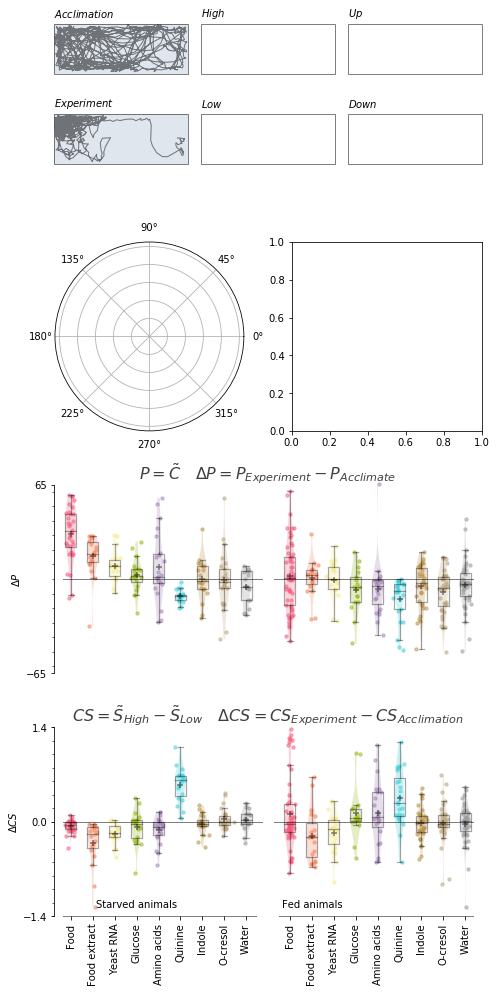

In [4]:
fig = plt.figure(figsize=(7, 14))
grid = matplotlib.gridspec.GridSpec(4, 2)

# SET UP FIGURES -----------------------------------------------------------------
ax1 = fig.add_subplot(grid[0, :], aspect="equal", facecolor="None")

ax3 = fig.add_subplot(grid[1, 0], polar=True, facecolor="None")
ax3.set_theta_zero_location('E')
# ax3.set_rlabel_position(0)
ax3.set_ylim(0, 1.05)
ax3.set_yticklabels([])

ax4 = fig.add_subplot(grid[1, 1], facecolor="None")

ax2 = fig.add_subplot(grid[2, :], facecolor="None")
ax5 = fig.add_subplot(grid[3, :], facecolor="None")

ax2.set_ylim(-65, 65)
ax2.set_yticks(np.arange(-60, 61, 10), minor=True)
ax2.set_yticks([-65, 65])

ax5.set_ylim(-1.4, 1.4)
ax5.set_yticks(np.arange(-1.4, 1.41, 0.2), minor=True)
ax5.set_yticks([-1.4, 0, 1.4])
    
# ADD LABELS AND ALSO EQUATIONS TO THE FIGURE -------------------------------------
ygap, xgap = 24, 8
ax1.set_ylim(30*2+ygap, 0)
ax1.set_xlim(0, 80*3+xgap*2)
ax1.axis("off")

# Add text labels to each small figure
ax1.text(0, -ygap*1/4, r"${Acclimation}$", ha="left", va="center")
ax1.text(0, ygap*3/4+30, r"${Experiment}$", ha="left", va="center")
ax1.text(80+xgap, -ygap*1/4, r"${High}$", ha="left", va="center")
ax1.text(80+xgap, ygap*3/4+30, r"${Low}$", ha="left", va="center")
ax1.text(2*80+2*xgap, -ygap*1/4, r"${Up}$", ha="left", va="center")
ax1.text(2*80+2*xgap, ygap*3/4+30, r"${Down}$", ha="left", va="center")

# Plot high and low concentration areas
plots = False
if plots == True: 
    n5 = './data/fluorescein/larvae_averages_1mm/10-00_averages.csv'
    data = np.array(pd.read_csv(n5, header=None).values)
    levels = [0, 50, 100]
    extent=[80+xgap, 2*80+xgap, 0, 30]
    ax1.contour(data, levels=levels, extend="both", alpha=0.5, colors=['k'], extent=extent, clip_on=False, lw=1)
    ax1.contourf(data, levels=levels, extend="both", alpha=0.5, cmap="bone_r", extent=extent, clip_on=False)
    extent=[80+xgap, 2*80+xgap, 30+ygap, 2*30+ygap]
    ax1.contour(data, levels=levels, extend="both", alpha=0.5, colors=['k'], extent=extent, clip_on=False, lw=1)
    ax1.contourf(data, levels=levels, extend="both", alpha=0.5, cmap="bone", extent=extent, clip_on=False)
    ax1.text(100.5, 5+3.5, "${C \geq 50}$", clip_on=False, ha="center", va="bottom", zorder=12, fontsize=10)
    ax1.text(120+xgap, 30+ygap+15, "${C<50}$", clip_on=False, ha="center", va="center", zorder=12, fontsize=10)

    # Add up and down concentration maps
    levels = np.arange(0, 101, 2)
    extent=[2*xgap+2*80+0, 2*xgap+2*80+80, 0, 30]
    ax1.contourf(data, levels=levels, extend="both", cmap="bone_r", extent=extent, clip_on=False)
    extent=[2*xgap+2*80, 2*xgap+2*80+80, 30+ygap, 2*30+ygap]
    ax1.contourf(data, levels=levels, extend="both", cmap="bone_r", extent=extent, clip_on=False)
    # ax1.arrow(2*xgap+3*80-5, 30-5, -35, -10, color="k", lw=1, alpha=0.5, 
    #           head_width=3, head_length=3, clip_on=False)
    # ax1.arrow(2*xgap+3*80-40, 30+ygap+15, 32, 9, color="k", lw=1, alpha=0.5, 
    #           head_width=3, head_length=3, clip_on=False)
    ax1.text(251, 15, r"${+ \Delta C}$", clip_on=False, ha="right", va="center", zorder=12, fontsize=10)
    ax1.text(251, 30+ygap+15, r"${- \Delta C}$", clip_on=False, ha="right", va="center", zorder=12, fontsize=10)

# Add Acclimation and Experiment plots
animal_ID = "170428-02-top"
exp_df = pd.read_csv('./data/trajectories/video_calculations/' + animal_ID + '-experiment.csv')
acc_df = pd.read_csv('./data/trajectories/video_calculations/' + animal_ID + '-acclimate.csv')
ax1.add_patch(pch.Rectangle((0, 0), 80, 30, facecolor=EL.c_neutral, 
                            alpha=0.25, lw=0, edgecolor="none", clip_on=False))
ax1.add_patch(pch.Rectangle((0, 30+ygap), 80, 30, facecolor=EL.c_neutral, 
                            alpha=0.25, lw=0, edgecolor="none", clip_on=False))
e_xs, e_ys = exp_df["pos_x_mm"].values, exp_df["pos_y_mm"].values+30+ygap
a_xs, a_ys = acc_df["pos_x_mm"].values, acc_df["pos_y_mm"].values
ax1.plot(e_xs, e_ys, color='k', alpha=0.5, lw=1, clip_on=False)
ax1.plot(a_xs, a_ys, color='k', alpha=0.5, lw=1, clip_on=False)

# Add rectangles to all six images
ax1.add_patch(pch.Rectangle((0, 0), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax1.add_patch(pch.Rectangle((0, 30+ygap), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax1.add_patch(pch.Rectangle((80+xgap, 0), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax1.add_patch(pch.Rectangle((80+xgap, 30+ygap), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax1.add_patch(pch.Rectangle((2*80+2*xgap, 0), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax1.add_patch(pch.Rectangle((2*80+2*xgap, 30+ygap), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))

# PLOT DATA ------------------------------------------------------------------------
axes = [ax2, ax5]
tests = ["median_conc_diff", "c_speed_diff"]
eqs = [r"${P = \tilde{C} \quad \Delta P = P_{Experiment}-P_{Acclimate}}$",
       r"${CS = \tilde{S}_{High} - \tilde{S}_{Low} \quad \Delta CS = CS_{Experiment}-CS_{Acclimation}}$"]
ps = ["****", "****", "***"]
ys = [r"${\Delta P}$", r"${\Delta CS}$"]

for n, (test, ax) in enumerate(zip(tests, axes)): 
    str_datum = [df[test].values for df in str_data]
    fed_datum = [df[test].values for df in fed_data]
    
    datamax = max(max([max(v) for v in str_datum]), max([max(v) for v in fed_datum]))
    datamin = min(min([min(v) for v in str_datum]), min([min(v) for v in fed_datum]))
    print(test, "values range from", round(datamax, 2), round(datamin, 2))
    
    datum = str_datum + [[0]] + fed_datum
    
    jitter = [np.random.normal(scale=0.1, size=len(x)) for x in datum]
    parts = ax.violinplot(datum, showmeans=False, showmedians=False, showextrema=False)
    box = ax.boxplot(datum, showfliers=False)
    
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.25)
        
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box[element], color="k", alpha=0.35, lw=1.25, clip_on=False, zorder=100)

    for i, (j, d) in enumerate(zip(jitter, datum)):
        j = [x+i+1 for x in j]
        if len(j) > 1:
            ax.scatter(j, d, alpha=0.5, s=EL.s, color=colors[i], clip_on=False, zorder=20)
            ax.scatter([i+1], np.mean(d), color="k", s=EL.s+30, alpha=0.5, zorder=21, marker="+", clip_on=False)
            
    gap = 0.02
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.set_xticks(np.arange(1, 16+4, 1))
    ax.set_xlim(0.25, 15.75+4)
    ax.set_xticklabels([])
    
    # Horizontal line at 0 for reference
    ax.axhline(y=0, xmin=0+gap, xmax=0.5-(gap/1.5), color="k", alpha=0.5, lw=1, zorder=200, clip_on=False)
    ax.axhline(y=0, xmin=0.5+(gap/1.5), xmax=1-gap, color="k", alpha=0.5, lw=1, zorder=200, clip_on=False)

    ax.set_ylabel(ys[n])
    ax.set_title(eqs[n], fontsize=16, alpha=0.75)
    
    # White box to cover up spacer boxplot
    low, high = ax.get_ylim()
    bit = (high-low)*0.05
    ax.add_patch(pch.Rectangle((7.5+2, low-bit), 1, (high-low)+bit, 
                               facecolor="#ffffff", edgecolor="none", zorder=110, clip_on=False))
        
    if ax == ax5:
        ax.text(4, low+bit*1.75, "Starved animals", clip_on=False, ha="center", va="top", zorder=12)
        ax.text(12, low+bit*1.75, "Fed animals", clip_on=False, ha="center", va="top", zorder=12)
        ax.set_xticklabels(labels + [" "] + labels, rotation=90)
        ax.axhline(y=low, xmin=0+gap, xmax=0.5-(gap/1.5), color="k", alpha=0.5, lw=1, clip_on=False)
        ax.axhline(y=low, xmin=0.5+(gap/1.5), xmax=1-gap, color="k", alpha=0.5, lw=1, clip_on=False)
        ax.xaxis.set_ticks_position('bottom') 
        
######### PLOT ANGLE DISTRIBUTION, FOOD, QUININE, WATER ############
N = 120
radii_show = False
if radii_show == True: 
    f_radii = []
    for ang in range(0, N):
        min_a = (360 / N) * ang
        max_a = (360 / N) * (ang+1)
        temp = [i for i in f_ang if i <= max_a]
        temp = [i for i in temp if i > min_a]
        f_radii.append(len(temp))

    q_radii = []
    for ang in range(0, N):
        min_a = (360 / N) * ang
        max_a = (360 / N) * (ang+1)
        temp = [i for i in q_ang if i <= max_a]
        temp = [i for i in temp if i > min_a]
        q_radii.append(len(temp))

    w_radii = []
    for ang in range(0, N):
        min_a = (360 / N) * ang
        max_a = (360 / N) * (ang+1)
        temp = [i for i in w_ang if i <= max_a]
        temp = [i for i in temp if i > min_a]
        w_radii.append(len(temp))

    # Normalize all frequencies to max 
    w_radii = [x/max(w_radii) for x in w_radii]
    f_radii = [x/max(f_radii) for x in f_radii]
    q_radii = [x/max(q_radii) for x in q_radii]
    theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
    width = np.radians(360 / N)
    ax3.bar(theta, f_radii, width=width, bottom=0.0, 
            lw=0, edgecolor="#ffffff", color=EL.c_food, alpha=0.5, label="Food")
    ax3.bar(theta, q_radii, width=width, bottom=0.0, 
            lw=0, edgecolor="#ffffff", color=EL.c_quinine, alpha=0.5, label="Quinine")
    ax3.bar(theta, w_radii, width=width, bottom=0.0, 
            lw=0, edgecolor="#ffffff", color=EL.c_water, alpha=0.5, label="Water")
    ax3.set_thetagrids(np.arange(0, 360, 45), frac=1.15)
    ax3.grid(linewidth=1, alpha=0.25, color="k")

    ######### PLOT ANGLE DELTA DISTRIBUTION, FOOD, QUININE, WATER ############
    bins = np.linspace(-180, 180, 50)
    ax4.hist(f_angd, bins=bins, color=EL.c_food, normed=True, 
             alpha=0.5, lw=0, edgecolor="#ffffff", label="Food")
    ax4.hist(q_angd, bins=bins, color=EL.c_quinine, normed=True, 
             alpha=0.5, lw=0, edgecolor="#ffffff", label="Quinine")
    ax4.hist(w_angd, bins=bins, color=EL.c_water, normed=True, 
             alpha=0.5, lw=0, edgecolor="#ffffff", label="Water")
    ax4.set_ylabel("Frequency (normalized)")
    ax4.set_xticks([-180, -90, 0, 90, 180])
    ax4.set_xticks(np.arange(-180, 180, 30), minor=True)
    ax4.set_yticks(np.arange(0, 0.02, 0.002), minor=True)
    ax4.set_xlim(-180, 180)
    ax4.set_ylim(0, 0.02)
    ax4.set_yticks([0, 0.01, 0.02])
    ax4.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.set_xlabel("${\Delta}$ Angle (degrees)")
    ax3.set_xlabel("Angle (degrees)")
    ax4.legend(frameon=False, loc='upper right', handletextpad=0.5, 
              bbox_to_anchor=(-0.095, 0, 1.05, 1.175), ncol=3, columnspacing=0.55)

# SET BOUNDARIES AND SAVE FIGURE -----------------------------------------------
plt.tight_layout()
# fig.subplots_adjust(wspace=0)
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()